In [1]:
import os

import matplotlib.pyplot as plt

In [2]:
dp_raw = "data/raw"
dp_m2_2_0_0 = "data/m2.w.errant.2.0.0"
dp_m2_2_3_0 = "data/m2.w.errant.2.3.0"

gec_datasets = [
    "fce-train",
    "nucle",
    "lang8",
    "wi_locness-train",
    
    "wi_locness-valid",
    
    "fce-test",
    "conll14",
    "wi_locness-test"
    "jfleg",
]
combined_datasets = [
    "train.w.err-free",
    "train.wo.err-free",
    
    "valid"
]

In [3]:
def get_raw_fp(dataset, ext):
    return os.path.join(dp_raw, f"{dataset}.{ext}")

def get_m2_fp(dataset, errant_ver):
    if errant_ver == (2, 0, 0):
        return os.path.join(dp_m2_2_0_0, f"{dataset}.m2")
    else:
        return os.path.join(dp_m2_2_3_0, f"{dataset}.m2")

# Size

In [4]:
def print_size(dataset):
    try:
        with open(get_raw_fp(dataset=dataset, ext="src")) as f:
            print(f"{dataset:<20} #{len(f.readlines())}")
    except FileNotFoundError:
        return

for dataset in gec_datasets:
    print_size(dataset=dataset)
print()
for dataset in combined_datasets:
    print_size(dataset=dataset)

fce-train            #28350
nucle                #57151
lang8                #1037561
wi_locness-train     #34308
wi_locness-valid     #4384
fce-test             #2695
conll14              #1312

train.w.err-free     #1157370
train.wo.err-free    #561525
valid                #4384


# Error Ratio

In [5]:
def print_err_ratio(dataset):
    try:
        with open(get_raw_fp(dataset=dataset, ext="src")) as f_src, open(get_raw_fp(dataset=dataset, ext="trg")) as f_trg:
            srcs = f_src.readlines()
            trgs = f_trg.readlines()
    except FileNotFoundError:
        return
    
    count_err = 0
    count_all = 0
    for src, trg in zip(srcs, trgs):
        if src != trg:
            count_err += 1
        count_all += 1
    print(f"{dataset:<20} {count_err/count_all:.2f}")

for dataset in gec_datasets:
    print_err_ratio(dataset=dataset)
print()
for dataset in combined_datasets:
    print_err_ratio(dataset=dataset)

fce-train            0.63
nucle                0.38
lang8                0.48
wi_locness-train     0.66
wi_locness-valid     0.64
fce-test             0.66
conll14              0.89

train.w.err-free     0.49
train.wo.err-free    1.00
valid                0.64


# Error Type Ratios

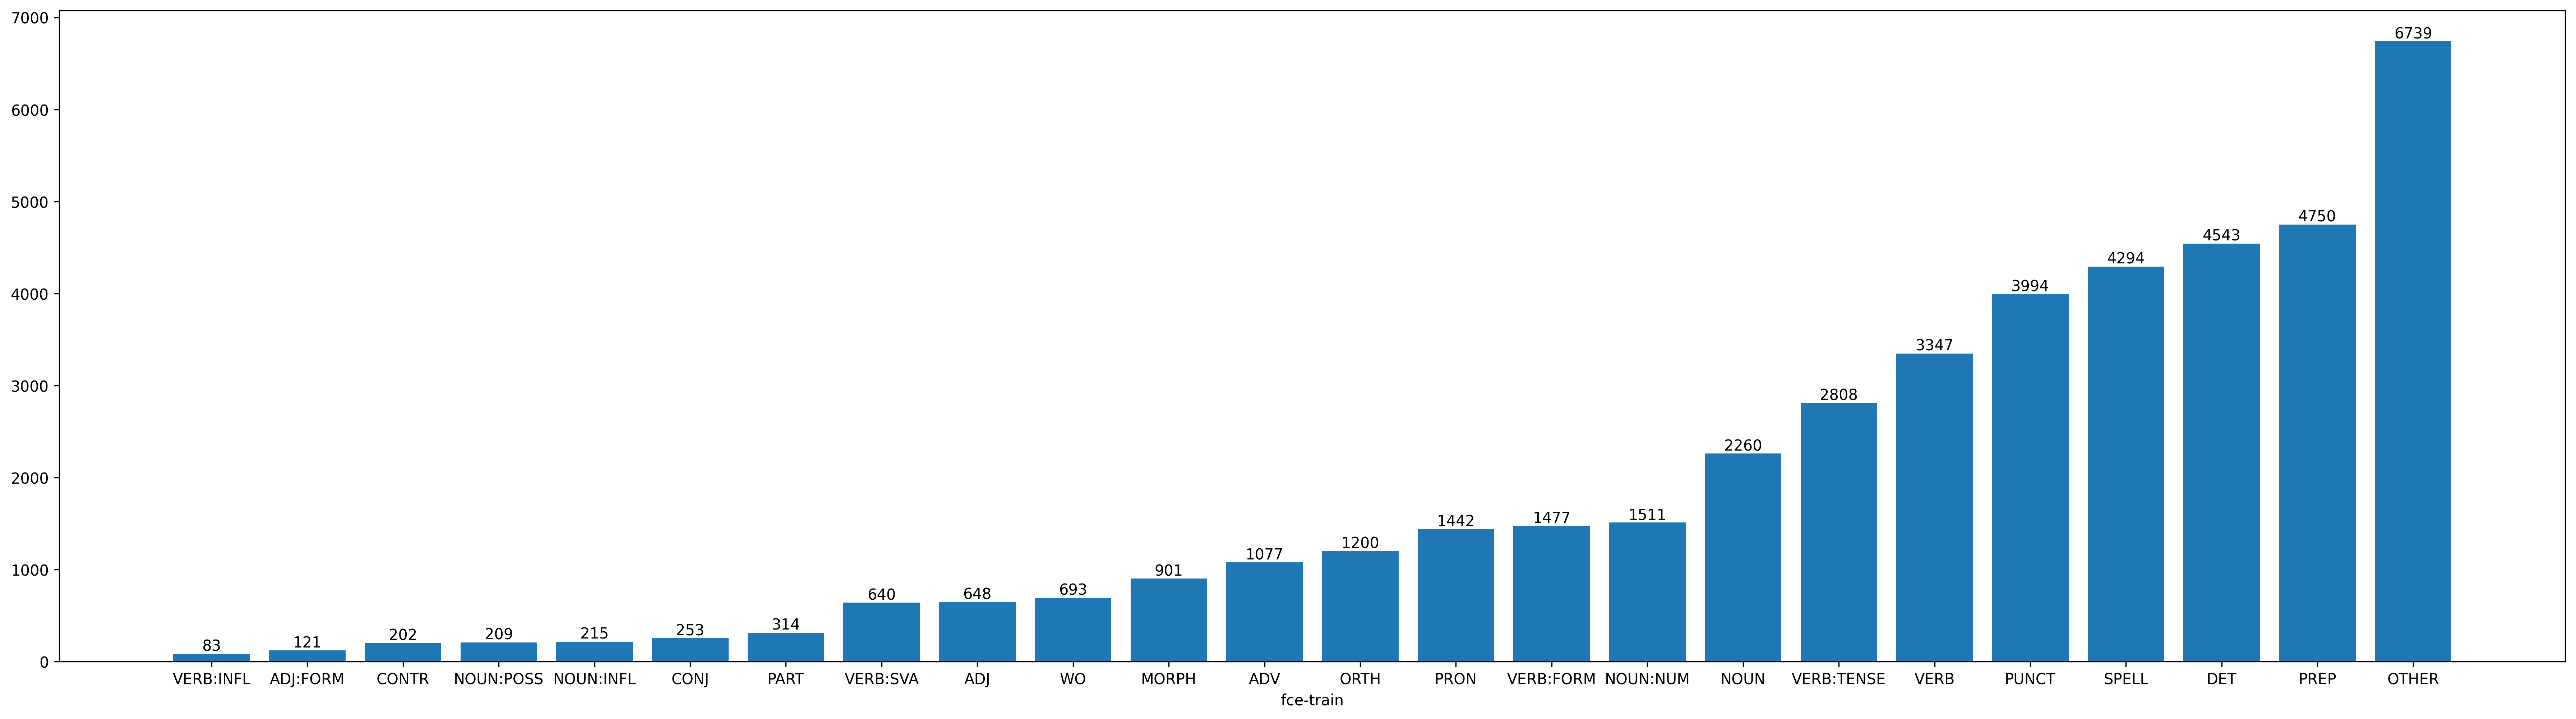

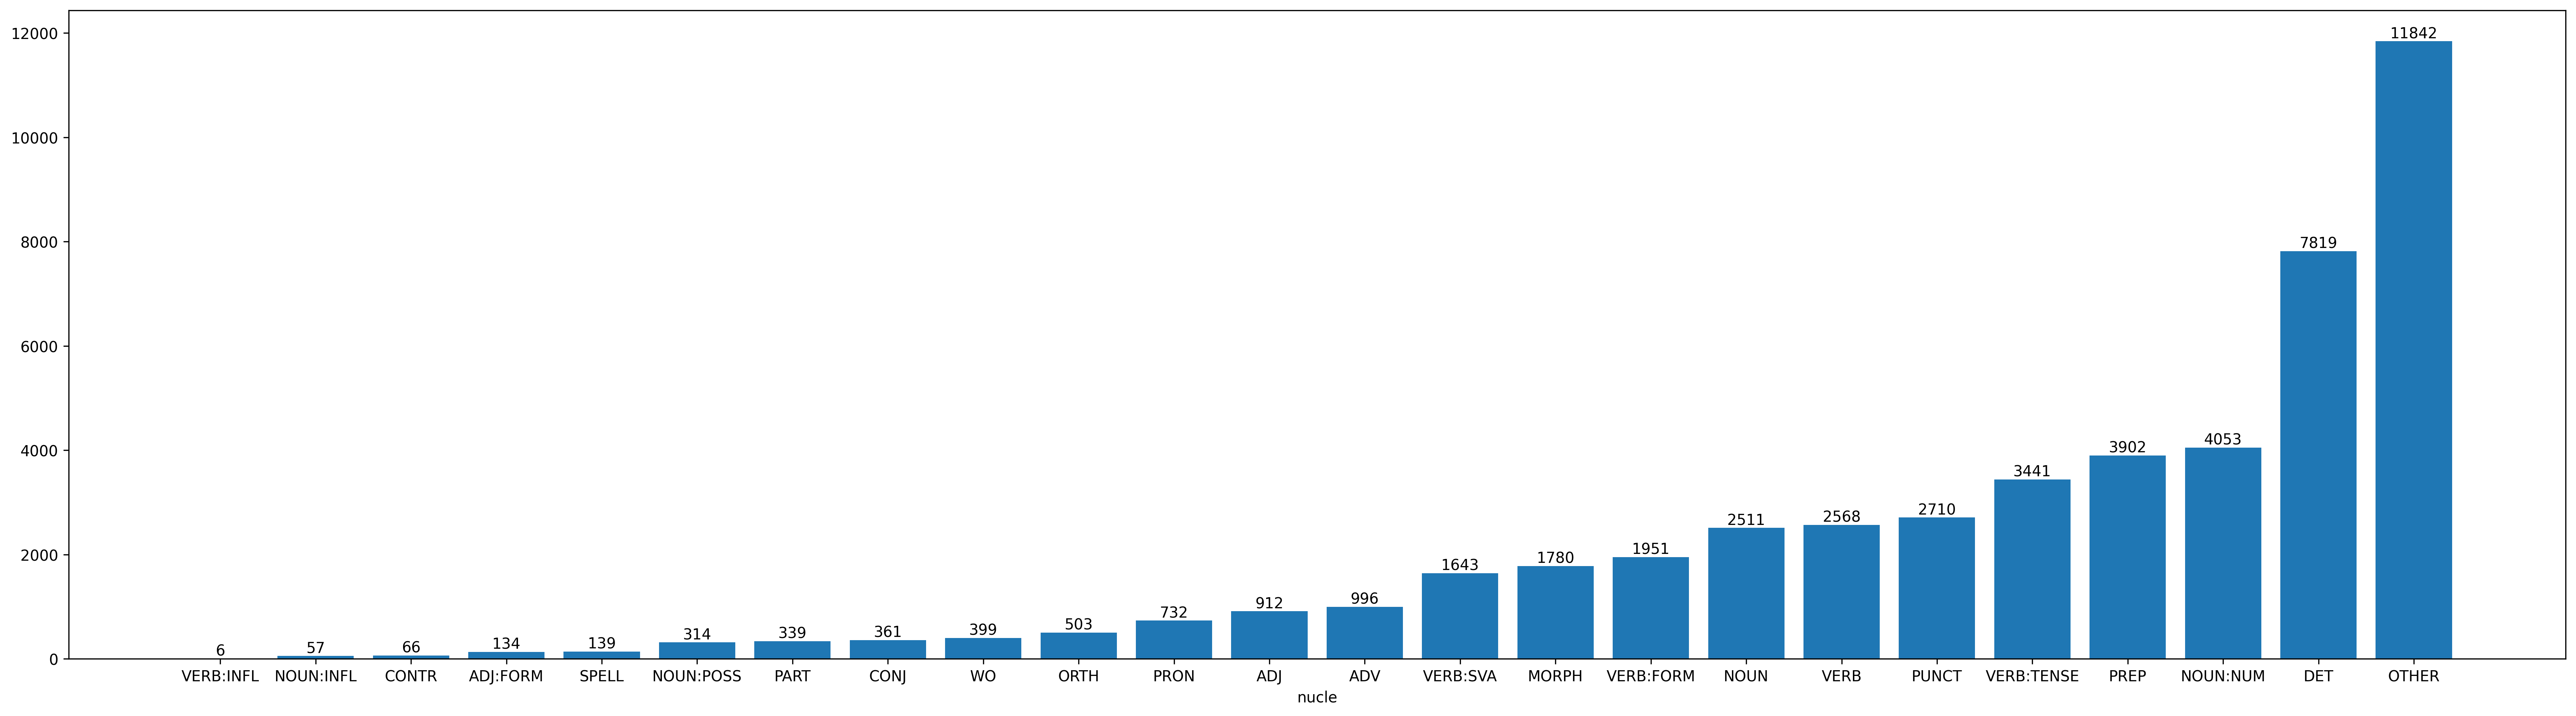

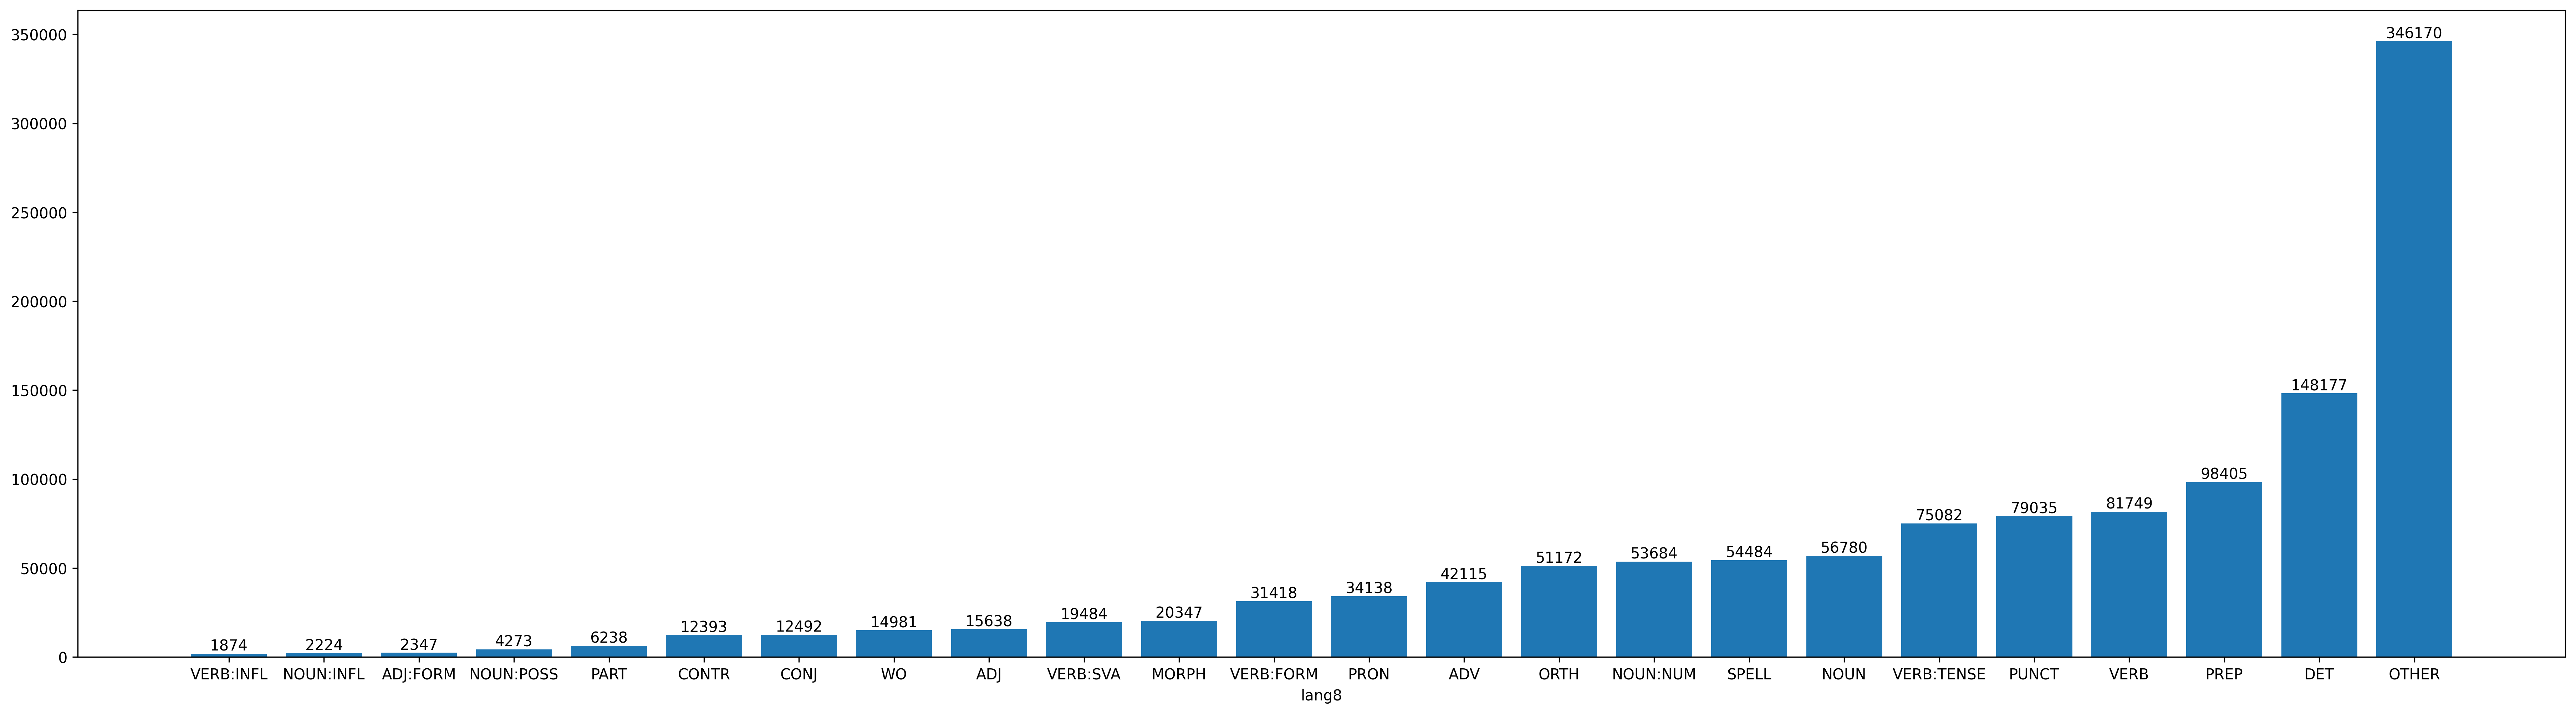

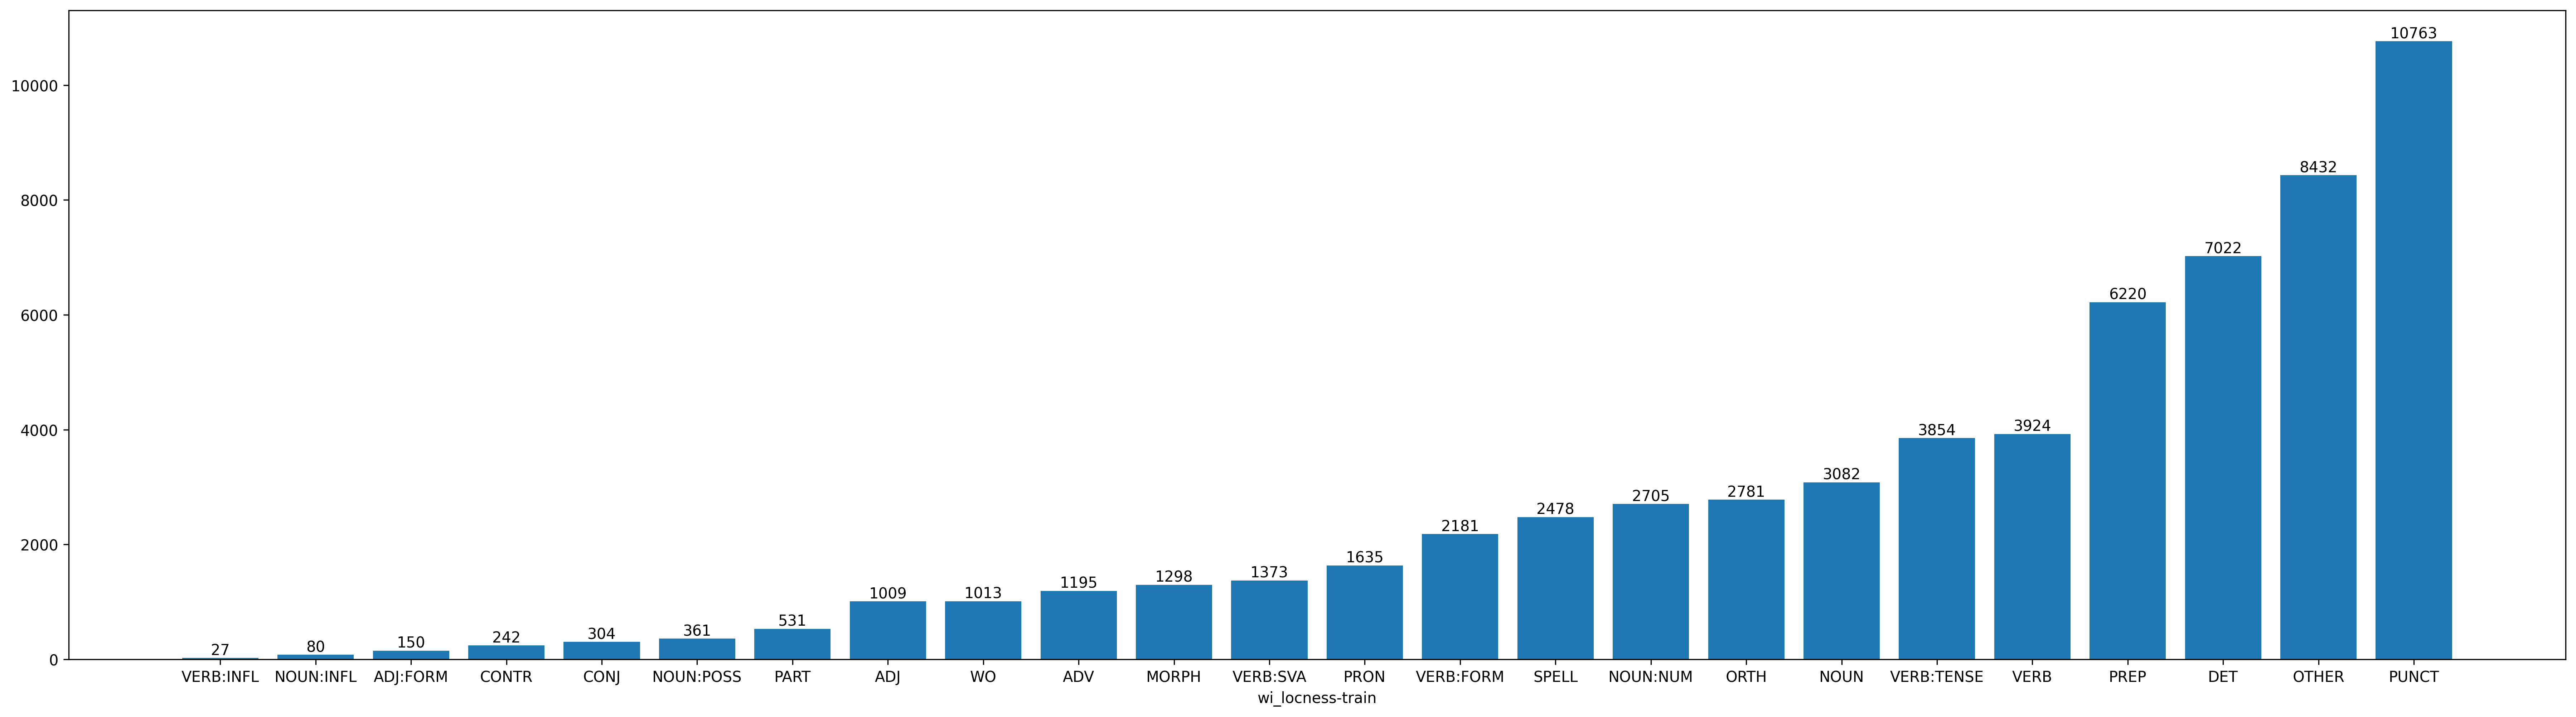

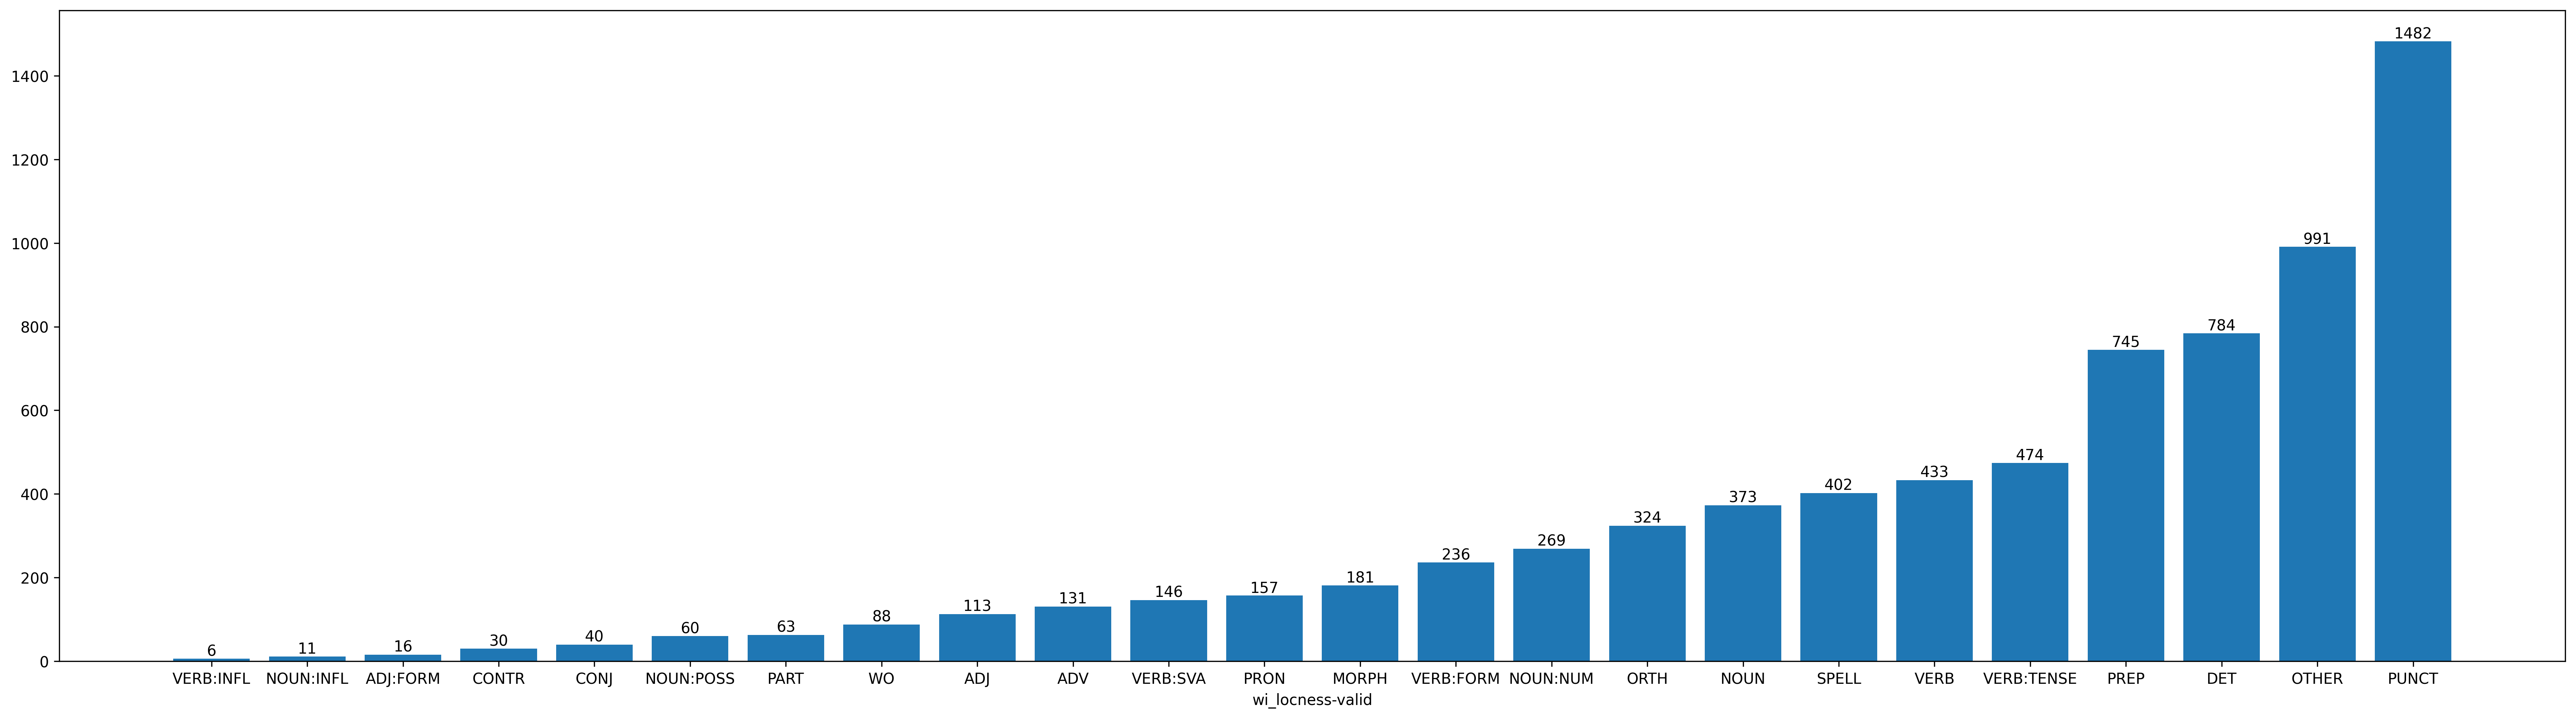

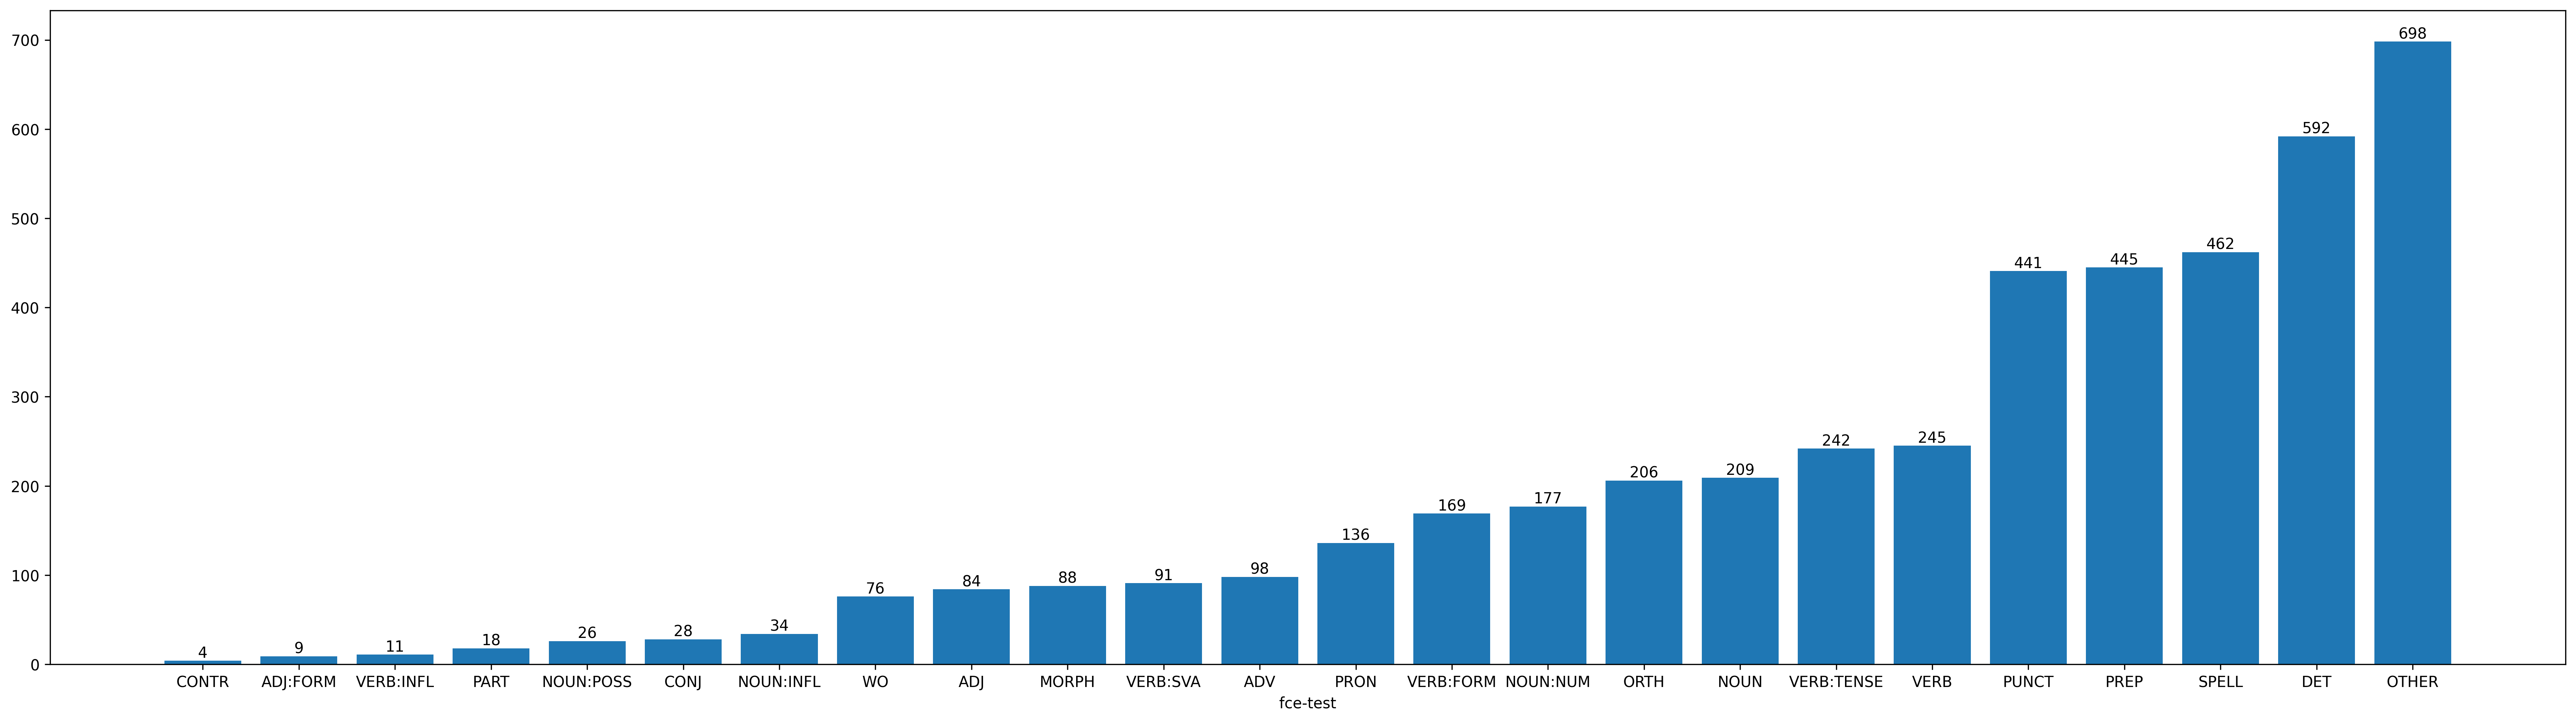

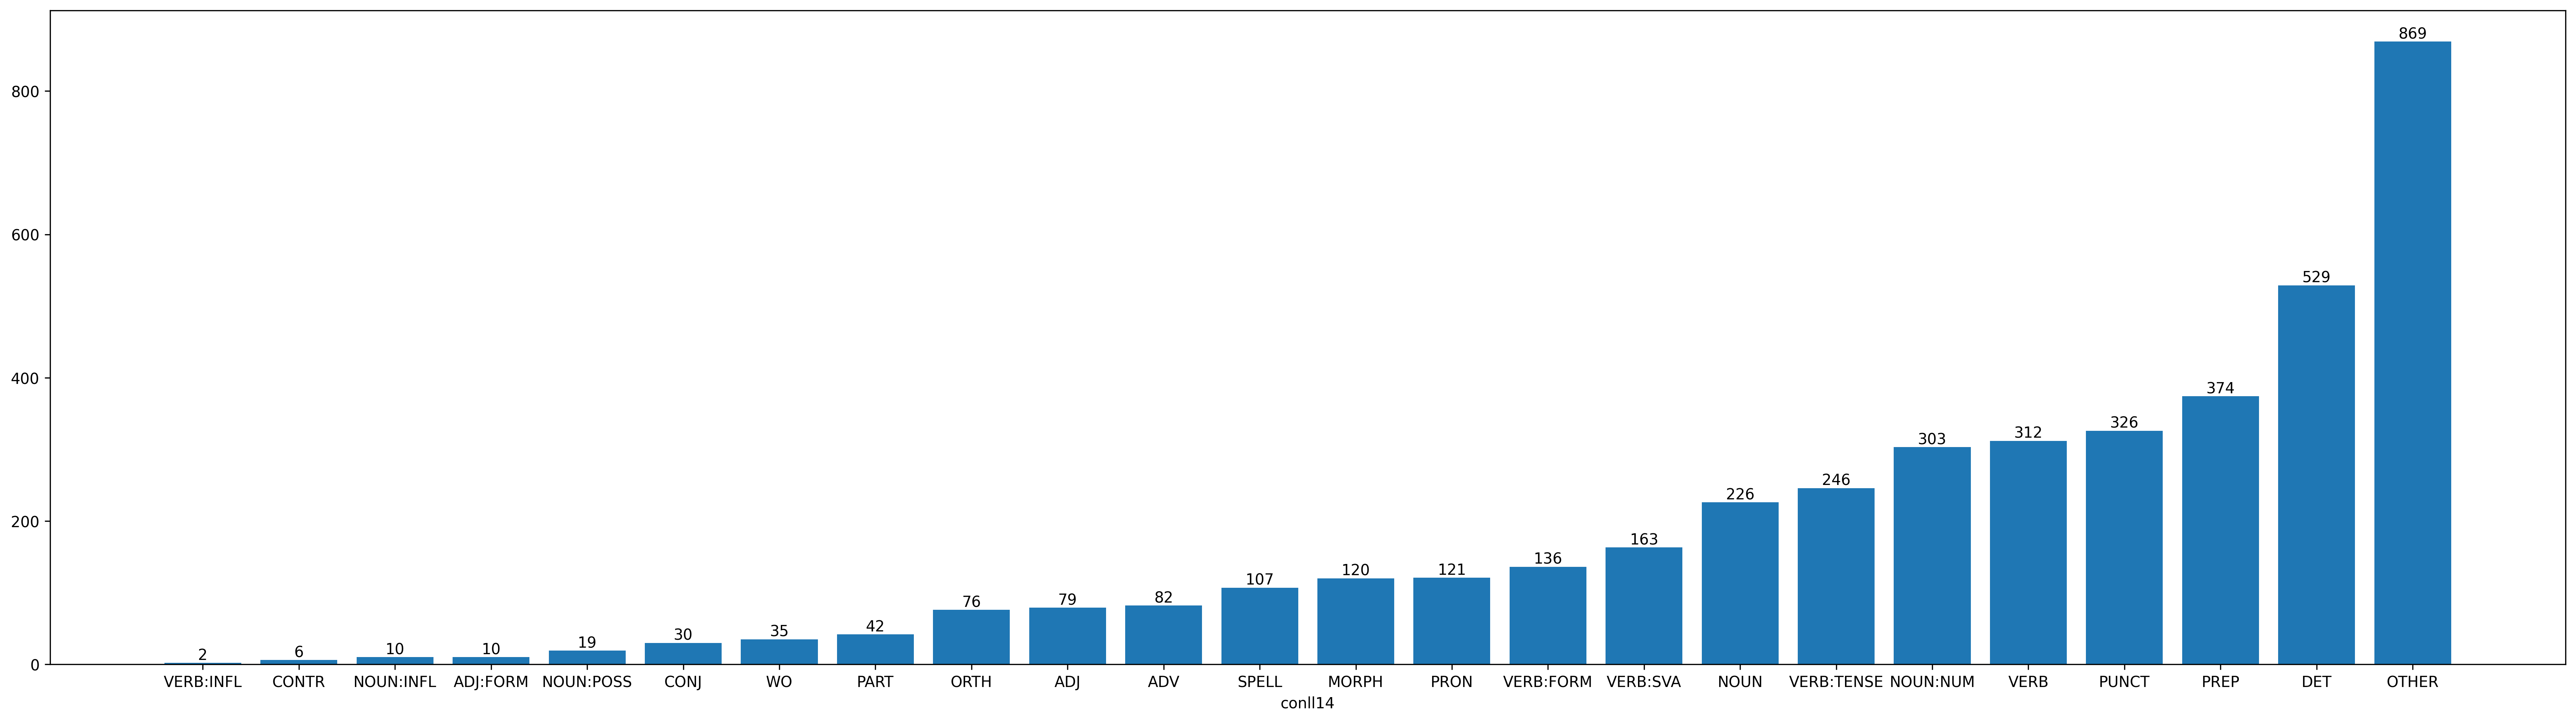

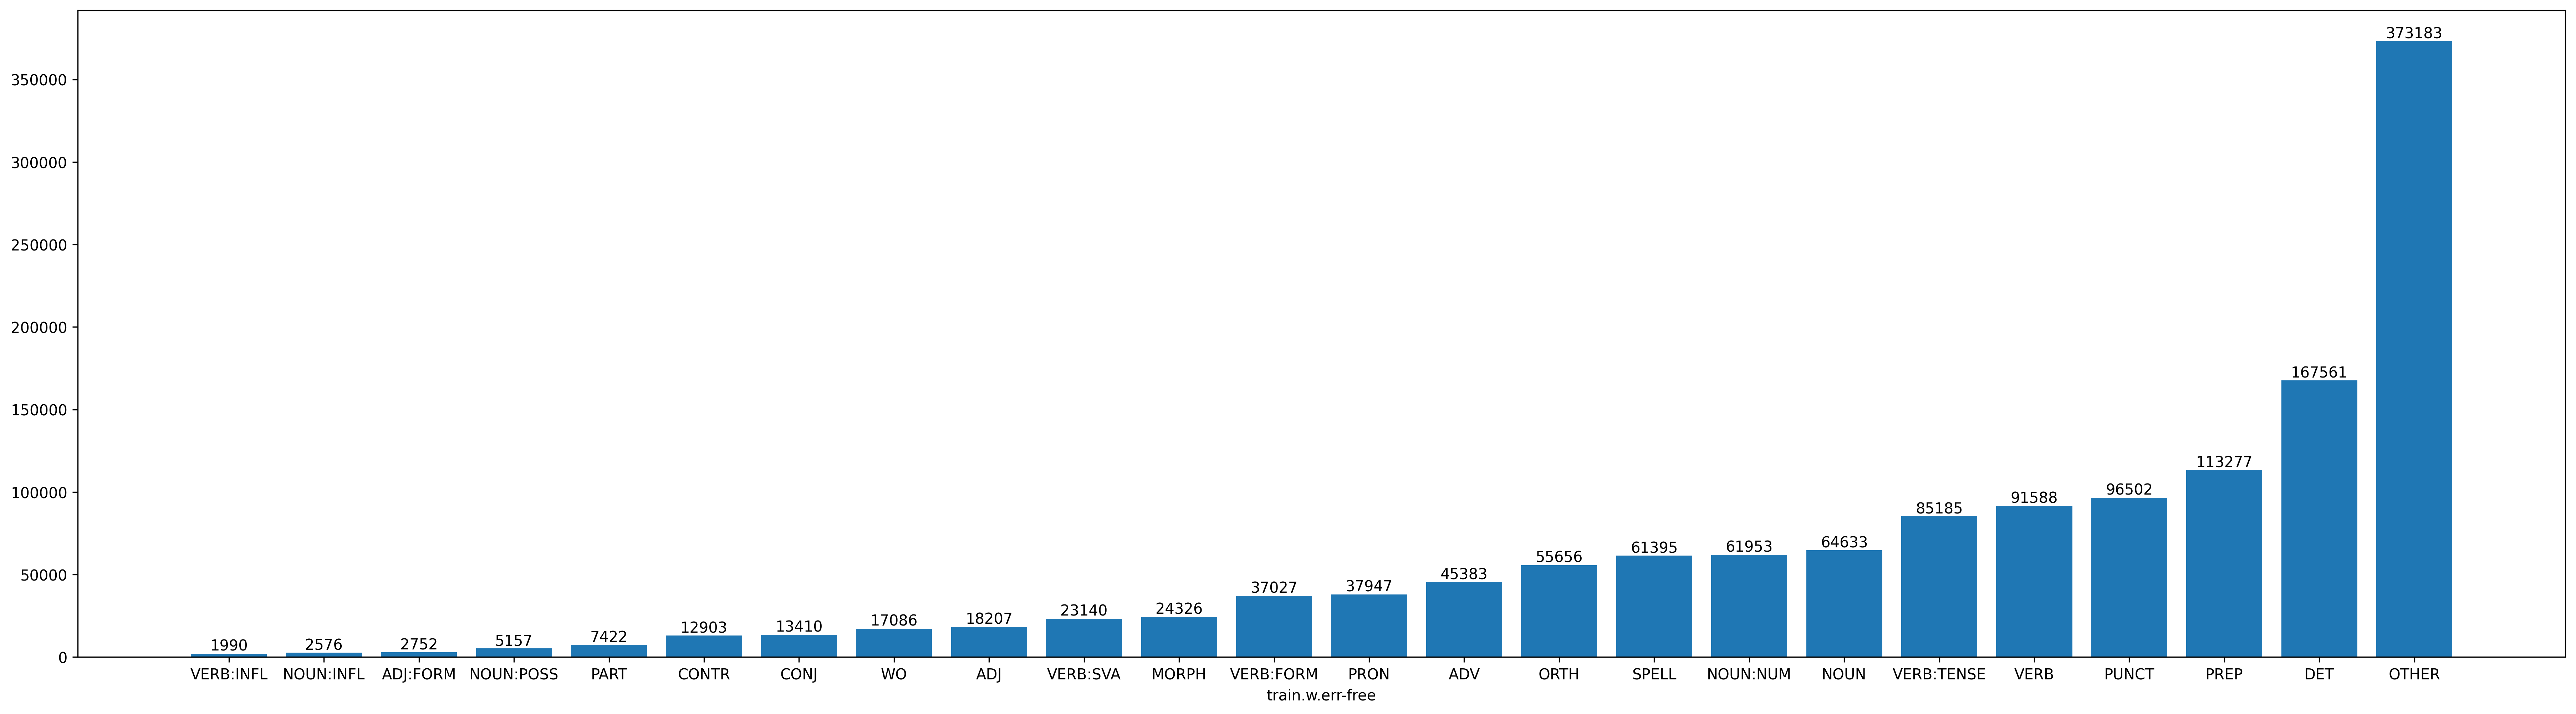

IndexError: list index out of range

In [11]:
def plot_err_type_ratio(dataset, errant_ver):
    try:
        with open(get_m2_fp(dataset, errant_ver)) as f:
            items = f.read().split("\n\n")
    except:
        return
    
    et_count = {}
    for item in items:
        annotations = item.split("\n")[1:]        
        for annotation in annotations:
            et = annotation.split("|||")[1].split(":", 1)[-1]
            if et == "noop":
                continue
            
            et_count.setdefault(et, 0)
            et_count[et] += 1
        
    et_count = dict(list(sorted(
        et_count.items(),
        key=lambda elem: elem[1],
    )))
        
    # Plots the ratio.
    xs = range(len(et_count))
    ys = list(et_count.values())
    ticks = list(et_count.keys())
    
    plt.figure(dpi=300,figsize=(30,8))
    p = plt.bar(ticks, ys)
    plt.bar_label(p, label_type='edge')
    plt.xlabel(dataset)
    plt.show()
    
for dataset in gec_datasets:
    plot_err_type_ratio(dataset=dataset, errant_ver=(2, 0, 0))
print()
for dataset in combined_datasets:
    plot_err_type_ratio(dataset=dataset, errant_ver=(2, 0, 0))